
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

Загрузим данные и взглянем на них:

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('shopping_trends.csv')

In [3]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [4]:
# Выведем информацию о типах данных  и пропущенных значениях
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [21]:
num_cols = list(df.select_dtypes(include=['number']).columns)
num_cols

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

In [22]:
num_cols.remove('Customer ID')

cat_cols = list(df.select_dtypes(include=['object']).columns)
cat_cols

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Payment Method',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Preferred Payment Method',
 'Frequency of Purchases']

In [23]:
# Посмотрим на статистику для числовых столбцов
df[num_cols].describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [24]:
# Теперь для категориальных
df[cat_cols].describe()

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [27]:
# Посмотрим, какие значения Category и Payment Method есть в датасете
df['Category'].value_counts(normalize = True).reset_index()

,Category,proportion
0,Clothing,0.445385
1,Accessories,0.317949
2,Footwear,0.153590
3,Outerwear,0.083077


In [28]:
df['Payment Method'].value_counts(normalize = True).reset_index()

,Payment Method,proportion
0,Credit Card,0.178462
1,Venmo,0.167436
2,Cash,0.166154
3,PayPal,0.163590
4,Debit Card,0.162308
5,Bank Transfer,0.162051


**Первая гипотеза:**

Женщины чаще мужчин покупают аксессуары 

<Axes: xlabel='Gender', ylabel='count'>

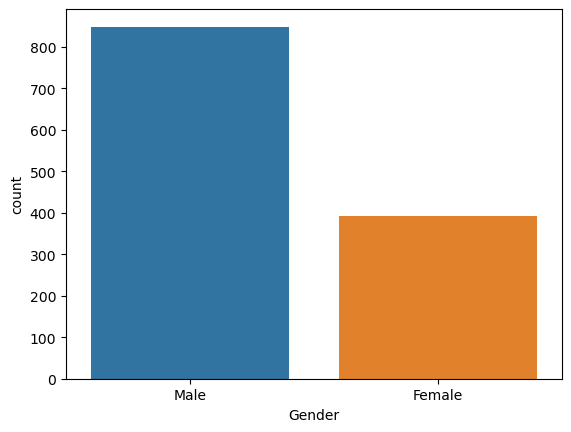

In [32]:
# Построим график
sns.countplot(data = df[df['Category'] == 'Accessories'], x = 'Gender', hue = 'Gender')

На первый взгяд, можно подумать что мужчины чаще покупают аксесуары, но нельзя забывать что мужчин в нашем датесете просто больше. Стоит посмотреть на частоту покупки этой категории для обоих полов.

In [39]:
(df.groupby('Gender', as_index = False)['Category'].value_counts(normalize = True)).query('Category == "Accessories"')

,Gender,Category,proportion
1,Female,Accessories,0.314103
5,Male,Accessories,0.319759


Здесь видно, что частота практически одинаковая

**Вывод:** Гипотеза не верна

---

**Вторая гипотеза:**

Более молодое поколение чаще расплачивается PayPal, чем старшее

<Axes: xlabel='Age', ylabel='Count'>

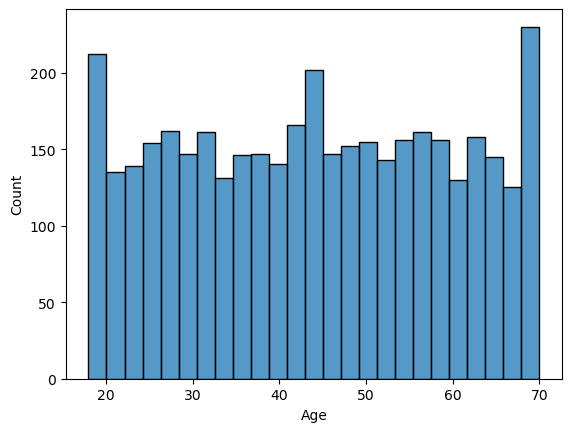

In [60]:
# Сначала построим гистограмму для возраста среди всех данных

sns.histplot(data = df, x = 'Age', bins = 25)

<Axes: xlabel='Age', ylabel='Count'>

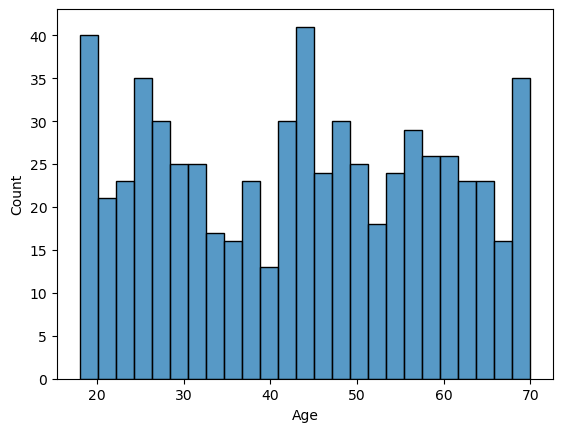

In [61]:
# Теперь посмотрим на гистограмму, при оплате с помощью PayPal

sns.histplot(data = df[df['Payment Method'] == 'PayPal'], x = 'Age', bins =25)

Выделим возрастные группы и посмотрим на частоту оплаты PayPal

In [86]:
age_groups = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['0-30', '30-50', '50-100'])
df['age_group'] = age_groups

In [97]:
grouped_age = df.groupby('age_group', as_index = False)['Payment Method'].value_counts(normalize = True)

In [99]:
grouped_age[grouped_age['Payment Method'] == 'PayPal']

,age_group,Payment Method,proportion
0,0-30,PayPal,0.183351
11,30-50,PayPal,0.158644
16,50-100,PayPal,0.155827


<Axes: xlabel='age_group', ylabel='proportion'>

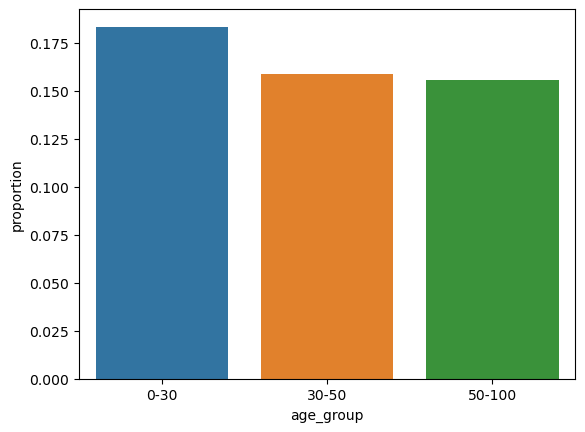

In [101]:
sns.barplot(data = grouped_age[grouped_age['Payment Method'] == 'PayPal'], x ='age_group', y = 'proportion', hue = 'age_group')

Если смотреть частоту оплаты PayPal для разных возрастных групп, то получается, что люди до 30 лет всего на 3% чаще оплачивают этим методом. Я бы сказал что данных слишком мало, чтобы говорить что гипотеза подтверждена

**Вывод:** различие слишком мало для подтверждения гипотезы

---

**Третья гипотезы:** Женщины тратят больше денег

<Axes: ylabel='Purchase Amount (USD)'>

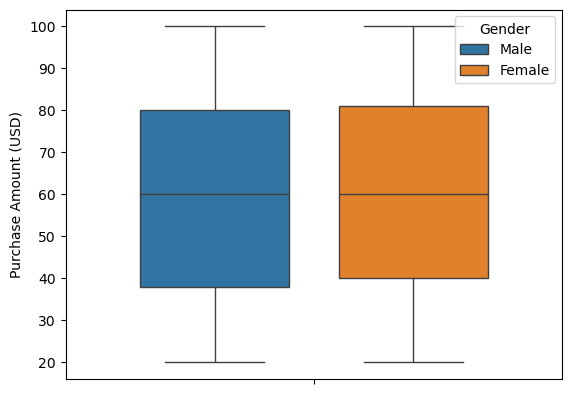

In [106]:
sns.boxplot(data = df, y = 'Purchase Amount (USD)', hue = 'Gender', widths=0.3)

**Вывод:** на основе графика boxplot, можно сказать что траты не зависят от пола

---

**Четвертая гипотеза:** В некоторых штатах (северных) чаще покупают одежду осенью (перед зимой утепляются)

In [109]:
pivot_table = df.pivot_table(
    index = 'Location',
    columns = 'Season',
    values = 'Customer ID',
    aggfunc = 'count'
)

In [111]:
percent_table = pivot_table.div(pivot_table.sum(axis = 1), axis = 0)

In [115]:
percent_table

Season,Fall,Spring,Summer,Winter
Location,,,,
Alabama,0.269663,0.269663,0.269663,0.191011
Alaska,0.208333,0.375000,0.166667,0.250000
Arizona,0.276923,0.246154,0.276923,0.200000
Arkansas,0.240506,0.303797,0.253165,0.202532
California,0.284211,0.242105,0.242105,0.231579
Colorado,0.160000,0.293333,0.240000,0.306667
Connecticut,0.256410,0.269231,0.192308,0.282051
Delaware,0.279070,0.255814,0.232558,0.232558
Florida,0.294118,0.191176,0.250000,0.264706


In [121]:
# Рассмотрим самые холодные штаты
print(f'Средний показатель для кол-ва покупок осенью относительно всех покупок среди всех штатов: {percent_table['Fall'].mean()}')
for state in ['Alaska', 'North Dakota', 'Minnesota', 'Wyoming']:
    print(f'Этот же показатель для штата {state}: {percent_table.loc[state]['Fall']}')

Средний показатель для кол-ва покупок осенью относительно всех покупок среди всех штатов: 0.2497807163854328
Этот же показатель для штата Alaska: 0.20833333333333334
Этот же показатель для штата North Dakota: 0.25301204819277107
Этот же показатель для штата Minnesota: 0.2840909090909091
Этот же показатель для штата Wyoming: 0.28169014084507044


**Вывод:** хотя для некоторых холодных штатов частота покупок осенью действительно выше, нельзя сказать что гипотеза на 100% верна из-за малого кол-ва данных

---

**Пятая гипотеза:** покупатели, воспользовавшиеся промокодом, оставляют более высокую оценку товару

<Axes: ylabel='Review Rating'>

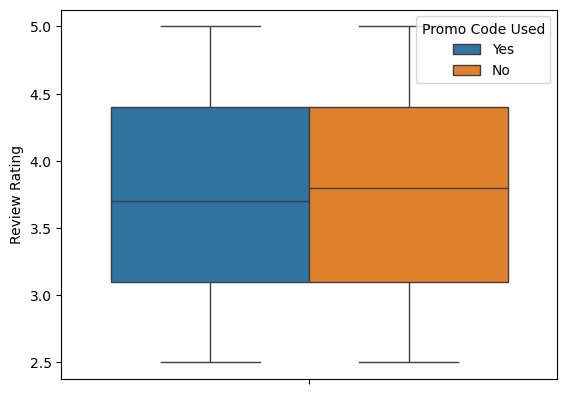

In [122]:
# Нарисуем boxplot
sns.boxplot(data = df, hue = 'Promo Code Used', y = 'Review Rating')

**Вывод:** разница незначительна

---

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар: 
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

In [126]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,50-100
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,0-30
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,30-50
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,0-30
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,30-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,30-50
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,50-100
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,30-50
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,30-50


**найдите самый популярный товар:**

In [127]:
df['Item Purchased'].value_counts().head()

Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

Самый популярный товар - **Blouse**

**постройте распределение покупателей по полу**

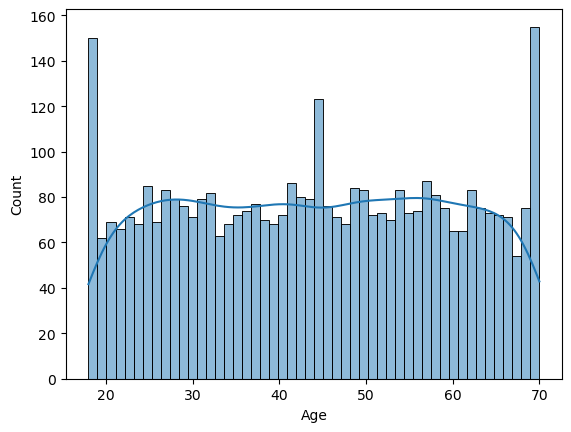

In [130]:
sns.histplot(data = df, x = 'Age', kde = True, bins = 50);

**определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары**

In [134]:
# Определим самые дорогие товары - товары, которые дороже 90% всех товаров
high_price = df['Purchase Amount (USD)'].quantile(0.9)

In [135]:
df['is_expensive'] = df['Purchase Amount (USD)'] >= high_price

In [137]:
grouped = df.groupby('Gender', as_index = False)['is_expensive'].mean()

In [138]:
grouped

,Gender,is_expensive
0,Female,0.104167
1,Male,0.104449


Для пола, чаще (хоть и немного) покупают Мужчины

In [140]:
df[df['is_expensive']]['Gender'].value_counts()

Gender
Male      277
Female    130
Name: count, dtype: int64

Если смотреть по абсолютным значениям, то больше всего дорогих вещей также покупают мужчины

In [141]:
# Посмотрим по возрасту
grouped = df.groupby('Age', as_index = False)['is_expensive'].mean()

In [145]:
grouped.sort_values(by = 'is_expensive', ascending= False).head()

,Age,is_expensive
6,24,0.205882
35,53,0.171429
31,49,0.166667
2,20,0.161290
26,44,0.156863


Для возраста, чаще всего покупают дорогие вещи покупатели в возрасте 24 лет

In [147]:
df[df['is_expensive']]['Age'].value_counts().head()

Age
24    14
49    14
28    12
25    12
54    12
Name: count, dtype: int64

Больше всего (опять же в абсолютных значениях) покупатели в возрасте 24 и 49 лет

**определите, есть ли зависимость между цветом одежды и сезоном**

In [152]:
pivot_table = df.pivot_table(
    index = 'Color',
    columns = 'Season',
    values = 'Customer ID',
    aggfunc = 'count'
)

In [153]:
percent_table = pivot_table.div(pivot_table.sum(axis = 1), axis = 0)

<Axes: xlabel='Season', ylabel='Color'>

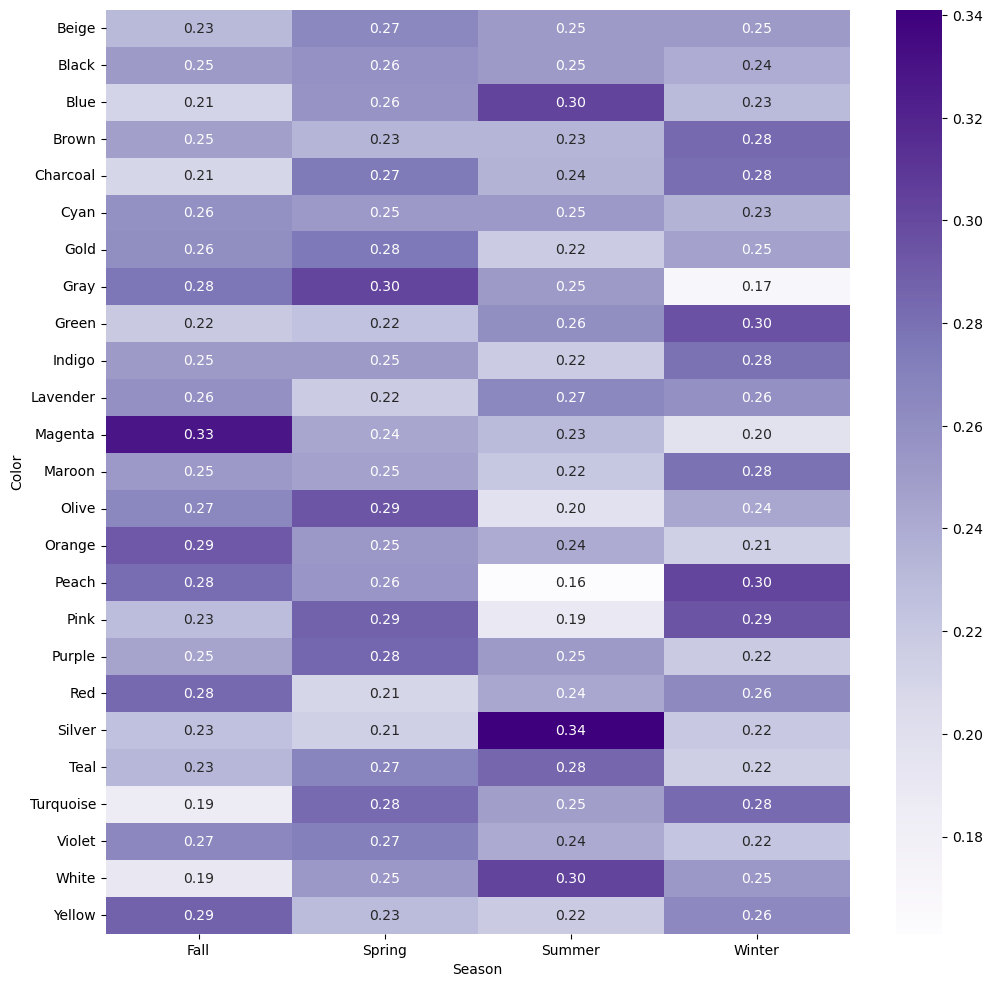

In [164]:
fig = plt.figure(figsize = (12, 12))
sns.heatmap(percent_table, annot = True, cmap = 'Purples', fmt = '.2f')

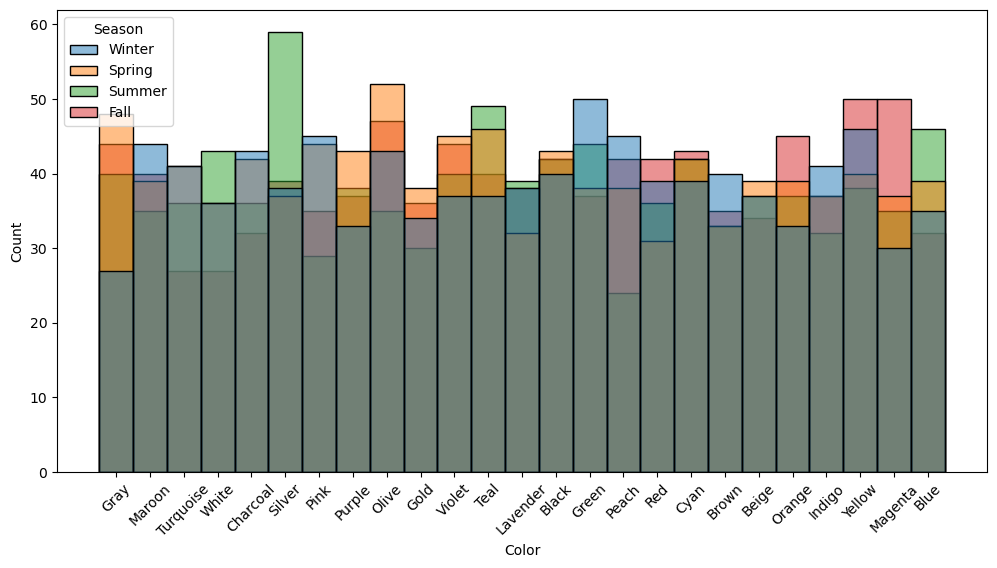

In [161]:
fig = plt.figure(figsize = (12, 6))
sns.histplot(data = df, x = 'Color', hue = 'Season')
plt.xticks(rotation=45);

В среднем зависимости нет, но для отдельных цветов виден перевес в определенный сезон:
- Для Silver чаще всего Summer
- Для Magenta чаще всего Fall
- Для Peach очень редко Summer

**посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.**

In [170]:
unique_users_per_season = df.groupby('Season', as_index = False)['Customer ID'].nunique()

In [171]:
unique_users_per_season

,Season,Customer ID
0,Fall,975
1,Spring,999
2,Summer,955
3,Winter,971


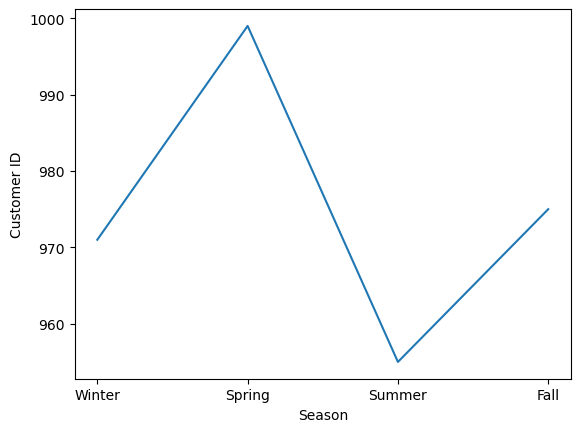

In [176]:
# Посмотри на его динамику
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
unique_users_per_season['Season'] = pd.Categorical(unique_users_per_season['Season'], categories=season_order, ordered=True)
sns.lineplot(x = unique_users_per_season['Season'], y = unique_users_per_season['Customer ID']);

**найдите самую популярную букву в названии одежды.** 

In [180]:
text = ''.join(df[df.Category == 'Clothing']['Item Purchased'].unique()).lower()

In [183]:
text

'blousesweaterjeansshirtshortsdressskirtpantshoodiet-shirtsocks'

In [184]:
counts = {i : text.count(i) for i in set(text)}

In [185]:
counts

{'i': 4,
 'b': 1,
 '-': 1,
 'o': 5,
 'w': 1,
 'h': 4,
 'r': 6,
 'd': 2,
 'l': 1,
 'n': 2,
 'p': 1,
 'j': 1,
 'e': 6,
 't': 7,
 'k': 2,
 'u': 1,
 'c': 1,
 's': 13,
 'a': 3}

Самамя популярная буква - **s**

<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 